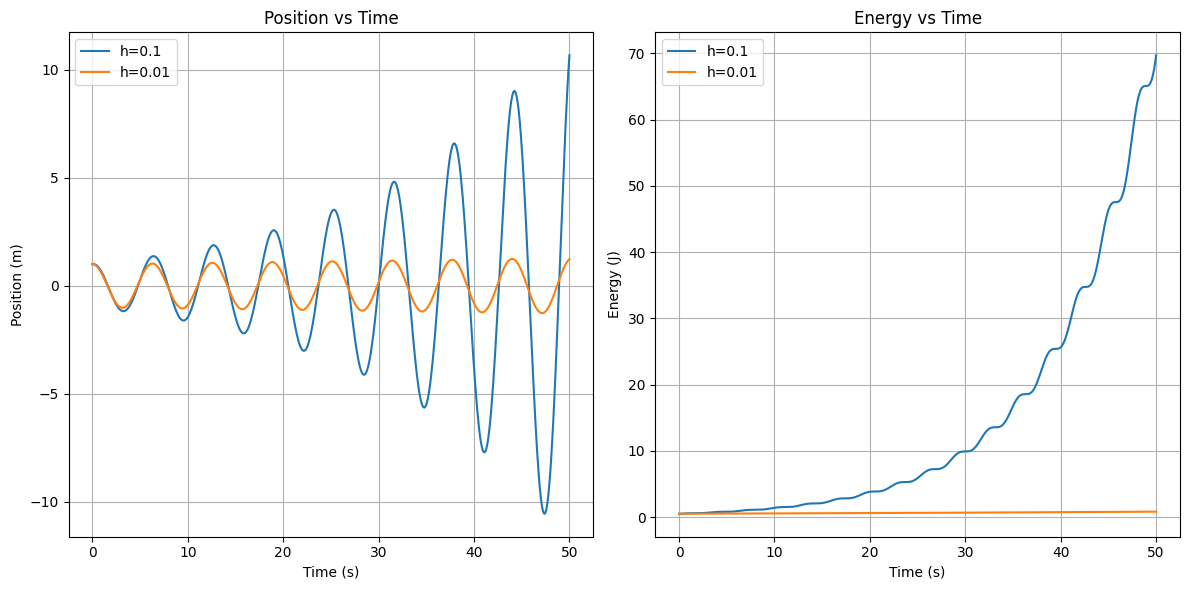

In [1]:
import matplotlib.pyplot as plt


def leapfrog(f, N, x0, v0):
    """
    跳蛙法（Leapfrog method）求解简谐运动微分方程
    参数：
    f  : 加速度函数（力函数）
    N  : 总时间步数
    x0 : 初始位置
    v0 : 初始速度

    返回：
    t_array : 时间序列
    x_array : 位置序列
    E_array : 机械能序列
    """
    h = 50 / N  # 计算步长（总时长50秒）
    t_array = []
    x_array = []
    E_array = []

    t = 0
    x = x0
    # 速度初始化：调整半步以对齐时间步（跳蛙法特点）
    v = v0 - h / 2 * f(x0)  # 半步步长修正

    # 初始能量计算（需要与后续计算方式保持一致）
    E = 0.5 * v0**2 + 0.5 * x**2

    for _ in range(N + 1):
        # 记录当前状态
        t_array.append(t)
        x_array.append(x)
        E_array.append(E)

        # 跳蛙法核心步骤
        x_new = x + h * v  # 用当前速度更新位置（前进整步）
        v_new = v + h * f(x)  # 用旧位置计算速度更新（注意这里用旧位置x）

        # 更新变量（位置和速度交替更新）
        v = v_new
        x = x_new
        t += h

        # 能量计算（需要将速度校正到整数时间步）
        # 校正公式：v_true = v + h/2*f(x_new)（同步位置和速度的时间步）
        E = 0.5 * (v + h / 2 * f(x)) ** 2 + 0.5 * x**2

    return t_array, x_array, E_array


def func(x):
    """简谐运动的力函数（加速度）：F(x) = -x"""
    return -x


# 主程序
if __name__ == "__main__":
    # 初始条件设置
    x0 = 1  # 初始位置（振幅）
    v0 = 0  # 初始速度（从最大位移处释放）
    f = func  # 指定力函数

    # 两种不同步长的计算
    N1 = 500  # 步数1（对应h=0.1，因为50/500=0.1）
    N2 = 5000  # 步数2（对应h=0.01，50/5000=0.01）

    # 执行计算
    t_array1, x_array1, E_array1 = leapfrog(f, N1, x0, v0)
    t_array2, x_array2, E_array2 = leapfrog(f, N2, x0, v0)

    # 绘制结果
    plt.figure(figsize=(12, 6))

    # 位置-时间图
    plt.subplot(1, 2, 1)
    plt.plot(t_array1, x_array1, label="h=0.1")
    plt.plot(t_array2, x_array2, label="h=0.01")
    plt.title("Position vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.legend()
    plt.grid(True)

    # 能量-时间图
    plt.subplot(1, 2, 2)
    plt.plot(t_array1, E_array1, label="h=0.1")
    plt.plot(t_array2, E_array2, label="h=0.01")
    plt.title("Energy vs Time")
    plt.xlabel("Time (s)")
    plt.ylabel("Energy (J)")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()  # 自动调整子图间距
    plt.show()